# [Continuous Distributions](probability.md#continuous-distributions)

Continuous distributions are used to model continuous random variables. The probability density function (pdf) of a continuous distribution is a function that describes the relative likelihood for this random variable to take on a given value. The area under the pdf is equal to 1. The probability that a continuous random variable is between two values is the area under the pdf between these values. The probability that a continuous random variable is less than a value is the area under the pdf to the left of this value. The probability that a continuous random variable is greater than a value is the area under the pdf to the right of this value.

- [Uniform distribution](#uniform-distribution)
- [Exponential distribution](#exponential-distribution)
- [Normal distribution](#normal-distribution) and [standarization](#standard-normal-distribution)
- [Gamma distribution](#gamma-distribution)
- [Beta distribution](#beta-distribution)
- [Weibull distribution](#weibull-distribution)
- [Chi-squared distribution](#chi-squared-distribution)
- [Student's t-distribution](#student's-t-distribution)
- [F-distribution](#f-distribution)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

sns.set_style("whitegrid")
data: np.ndarray  # Data for plotting

### Uniform Distribution

The uniform distribution is a continuous probability distribution that has constant probability.

$$
f(x) = \begin{cases}
\frac{1}{b - a} & \text{if } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$

- mean $\mu = \frac{a + b}{2}$

- variance $\sigma^2 = \frac{(b - a)^2}{12}$


count    1000.000000
mean        0.523911
std         0.292716
min         0.000610
25%         0.276068
50%         0.526256
75%         0.790709
max         0.999889
dtype: float64


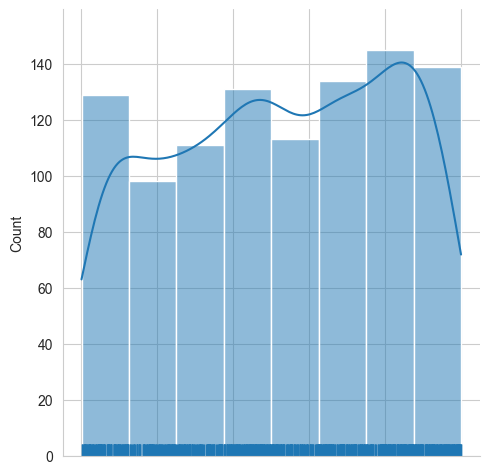

In [2]:
data = np.random.uniform(  # random uniform distribution
    low=0,
    high=1,
    size=1000
    )

uniform: sns.FacetGrid = sns.displot(data, fill=True, kde=True, rug=True, bins=8)
uniform.set(xlabel=None, xticklabels=[])  #  remove x axis and labels
print(pd.Series(data).describe())

### Exponential Distribution

The exponential distribution is a continuous probability distribution that describes the time between events in a Poisson process, i.e. a process in which events occur continuously and independently at a constant average rate.

$$
f(x) = \begin{cases}
\lambda e^{-\lambda x} & \text{if } x \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

- mean $\mu = \frac{1}{\lambda}$
- variance $\sigma^2 = \frac{1}{\lambda^2}$
- skewness $g_1 = 2$
- kurtosis $g_2 = 6$

count    1000.000000
mean        1.945195
std         1.827476
min         0.000844
25%         0.600434
50%         1.489539
75%         2.651461
max        12.995246
dtype: float64


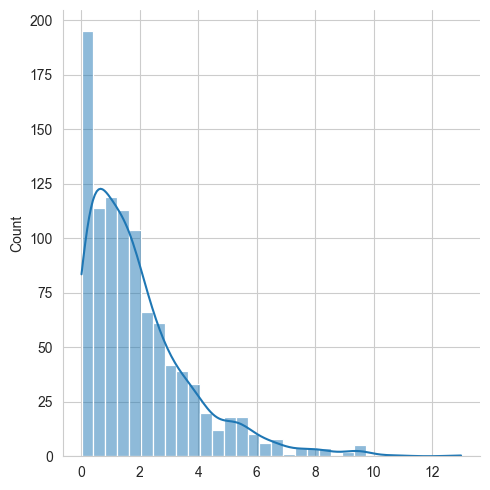

In [3]:
data = np.random.exponential(  # random exponetial distribution
    # random.exponential is the same as random.weibull(a=1, size=None)
    size=1000,  # Number of samples
    scale=2  # beta = 1/lamda     # lamda = scale
    )
expotential: sns.FacetGrid = sns.displot(data, kde=True)
# expotential: sns.FacetGrid = sns.kdeplot(data)
print(pd.Series(data).describe())

### Normal Distribution

The normal distribution is a continuous probability distribution that describes a symmetrical bell-shaped curve.

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

- mean $\mu$
- variance $\sigma^2$
- skewness $g_1 = 0$
- kurtosis $g_2 = 3$

count    100.000000
mean      -0.070719
std        1.016532
min       -2.987180
25%       -0.827580
50%        0.006173
75%        0.600586
max        2.955382
dtype: float64


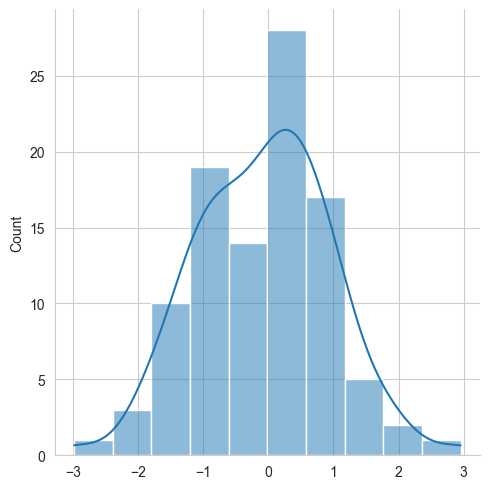

In [4]:
data: np.ndarray = np.random.normal(  # random normal distribution
    size=100,  # size
    loc=0,  # mean
    scale=1  # standard deviation
    )

normal: sns.FacetGrid = sns.displot(data, kde=True)  # plot data
print(pd.Series(data).describe())  # describe data

##### Standard Normal Distribution

The standard normal distribution is a normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$.

$$
f(x) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}}
$$

- mean $\mu = 0$
- variance $\sigma^2 = 1$
- skewness $g_1 = 0$
- kurtosis $g_2 = 3$

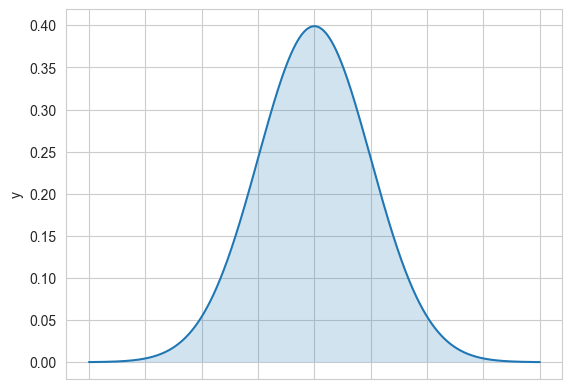

In [5]:
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, loc=0, scale=1)
data = pd.DataFrame({"x": x, "y": y})

normal = sns.lineplot(data=data, x="x", y="y")
#  fill the area under the curve
normal.fill_between(x=x, y1=y, alpha=0.2)
normal.set(xlabel=None, xticklabels=[])  #  remove x axis and labels
plt.show()

### Gamma Distribution

The gamma distribution is a continuous probability distribution that describes the sum of independent exponentially distributed random variables.

$$
f(x) = \begin{cases}
\frac{\lambda^k}{\Gamma(k)} x^{k - 1} e^{-\lambda x} & \text{if } x \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

- mean $\mu = \frac{k}{\lambda}$
- variance $\sigma^2 = \frac{k}{\lambda^2}$
- skewness $g_1 = \frac{2}{\sqrt{k}}$
- kurtosis $g_2 = \frac{6}{k}$
- mode $\lambda (k - 1)$

### Beta Distribution

The beta distribution is a continuous probability distribution that describes the probability of a random variable being between 0 and 1.

$$
f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha - 1} (1 - x)^{\beta - 1}
$$

- mean $\mu = \frac{\alpha}{\alpha + \beta}$
- variance $\sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$
- skewness $g_1 = \frac{2 (\beta - \alpha) \sqrt{\alpha + \beta + 1}}{(\alpha + \beta + 2) \sqrt{\alpha \beta}}$
- kurtosis $g_2 = \frac{6 (\alpha^2 \beta^2 + \alpha^3 \beta + \alpha \beta^3 - 2 \alpha^2 \beta - 2 \alpha \beta^2)}{\alpha \beta (\alpha + \beta + 2) (\alpha + \beta + 3)}$

### Weibull Distribution

The Weibull distribution is a continuous probability distribution that describes the time until an event occurs.

$$
f(x) = \begin{cases}
\frac{k}{\lambda} (\frac{x}{\lambda})^{k - 1} e^{-(\frac{x}{\lambda})^k} & \text{if } x \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

- mean $\mu = \lambda \Gamma(1 + \frac{1}{k})$
- variance $\sigma^2 = \lambda^2 \left[ \Gamma(1 + \frac{2}{k}) - \left( \Gamma(1 + \frac{1}{k}) \right)^2 \right]$
- skewness $g_1 = \frac{2 \left( \Gamma(1 + \frac{1}{k}) \right)^3 - 3 \Gamma(1 + \frac{1}{k}) \Gamma(1 + \frac{2}{k}) + \Gamma(1 + \frac{3}{k})}{\left( \Gamma(1 + \frac{2}{k}) - \left( \Gamma(1 + \frac{1}{k}) \right)^2 \right)^{3/2}}$
- kurtosis $g_2 = \frac{6 \left( \Gamma(1 + \frac{1}{k}) \right)^4 - 4 \Gamma(1 + \frac{1}{k}) \Gamma(1 + \frac{2}{k}) \left( 3 \Gamma(1 + \frac{1}{k}) + \Gamma(1 + \frac{3}{k}) \right) + \Gamma(1 + \frac{4}{k}) + 3 \left( \Gamma(1 + \frac{2}{k}) - \left( \Gamma(1 + \frac{1}{k}) \right)^2 \right)^2}{\left( \Gamma(1 + \frac{2}{k}) - \left( \Gamma(1 + \frac{1}{k}) \right)^2 \right)^2}$

### Chi-Squared Distribution

The chi-squared distribution is a continuous probability distribution that describes the sum of the squares of k independent standard normal random variables.

$$
f(x) = \frac{1}{2^{\frac{k}{2}} \Gamma(\frac{k}{2})} x^{\frac{k}{2} - 1} e^{-\frac{x}{2}}
$$

- mean $\mu = k$
- variance $\sigma^2 = 2k$
- skewness $g_1 = \frac{2}{\sqrt{k}}$
- kurtosis $g_2 = \frac{6}{k}$

### Student's t-Distribution

The Student's t-distribution is a continuous probability distribution that describes the ratio of the sample mean to the sample standard deviation.

$$
f(x) = \frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\pi \nu} \Gamma(\frac{\nu}{2})} \left( 1 + \frac{x^2}{\nu} \right)^{-\frac{\nu + 1}{2}}
$$

- mean $\mu = 0$ if $\nu > 1$, undefined otherwise
- variance $\sigma^2 = \frac{\nu}{\nu - 2}$ if $\nu > 2$, undefined otherwise
- skewness $g_1 = 0$ if $\nu > 3$, undefined otherwise
- kurtosis $g_2 = \frac{6 \nu^2 + 6 \nu - 1}{\nu - 4}$ if $\nu > 4$, undefined otherwise


### F-Distribution

The F-distribution is a continuous probability distribution that describes the ratio of two chi-squared random variables.

$$
f(x) = \frac{\Gamma(\frac{\nu_1 + \nu_2}{2})}{\Gamma(\frac{\nu_1}{2}) \Gamma(\frac{\nu_2}{2}) \sqrt{\nu_1 \nu_2 \pi} x^{\frac{\nu_1}{2} - 1} \left( \frac{\nu_1}{\nu_1 + \nu_2 x} \right)^{\frac{\nu_1 + \nu_2}{2}}}
$$

- mean $\mu = \frac{\nu_2}{\nu_2 - 2}$ if $\nu_2 > 2$, undefined otherwise
- variance $\sigma^2 = \frac{2 \nu_2^2 (\nu_1 + \nu_2 - 2)}{\nu_1 (\nu_2 - 2)^2 (\nu_2 - 4)}$ if $\nu_1 > 2$ and $\nu_2 > 4$, undefined otherwise
- skewness $g_1 = \frac{2 \left( \nu_2 - 2 \right) \sqrt{\nu_1 + \nu_2 - 2}}{\nu_1 \nu_2 (\nu_2 - 4)}$ if $\nu_1 > 2$ and $\nu_2 > 4$, undefined otherwise
- kurtosis $g_2 = \frac{6 \nu_1^2 (\nu_1 + \nu_2 - 2) + \nu_2^2 (\nu_1 + 6 \nu_2 - 16) + 6 \nu_1 \nu_2 (\nu_2 - 2) - 4 \nu_1 (\nu_2 - 2) - 8 \nu_2 + 12}{\nu_1 \nu_2 (\nu_2 - 4) (\nu_2 - 6)}$ if $\nu_1 > 2$ and $\nu_2 > 6$, undefined otherwise

----
There some other distributions that are not included in this list, but they are not as commonly used as the ones above. If you are interested in learning more about them, you can check out the [Wikipedia page on probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions).

---- 
----

### Logistic Distribution

The logistic distribution is a continuous probability distribution that describes the outcome of a single continuous experiment. It has two possible outcomes, $\mu$ and $\sigma$. The logistic distribution is defined by the following probability density function:

$$f(x) = \frac{e^{-(x - \mu)/\sigma}}{\sigma\left(1 + e^{-(x - \mu)/\sigma}\right)^2}$$

where $\sigma > 0$.

### Log-Normal Distribution

The log-normal distribution is a continuous probability distribution that describes the outcome of a single continuous experiment. It has two possible outcomes, $\mu$ and $\sigma$. The log-normal distribution is defined by the following probability density function:

$$f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}$$

where $\sigma > 0$.

### Pareto Distribution

The Pareto distribution is a continuous probability distribution that describes the outcome of a single continuous experiment. It has two possible outcomes, $\alpha$ and $x_m$. The Pareto distribution is defined by the following probability density function:

$$f(x) = \begin{cases} \frac{\alpha x_m^\alpha}{x^{\alpha + 1}} & x \geq x_m \\ 0 & \text{otherwise} \end{cases}$$

where $\alpha > 0$ and $x_m > 0$.

### Cauchy Distribution

The Cauchy distribution is a continuous probability distribution that describes the outcome of a single continuous experiment. It has two possible outcomes, $\mu$ and $\gamma$. The Cauchy distribution is defined by the following probability density function:

$$f(x) = \frac{1}{\pi\gamma}\frac{1}{1 + \left(\frac{x - \mu}{\gamma}\right)^2}$$

where $\gamma > 0$.

### Rayleigh Distribution

The Rayleigh distribution is a continuous probability distribution that describes the outcome of a single continuous experiment. It has two possible outcomes, $\sigma$ and $x$. The Rayleigh distribution is defined by the following probability density function:

$$f(x) = \begin{cases} \frac{x}{\sigma^2}e^{-\frac{x^2}{2\sigma^2}} & x \geq 0 \\ 0 & \text{otherwise} \end{cases}$$

where $\sigma > 0$.